## Tugas dan Langkah
Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum dilakukan permodelan.

Pada tugas kali ini, kamu akan melakukan Data Preprocessing (Data Cleansing) bulan lalu, yakni Juni 2020.

Langkah yang akan dilakukan adalah,

1. Mencari ID pelanggan (Nomor telepon) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4. Menstandardisasi Nilai dari Variable

## Library yang Digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data.

1. Pandas

Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

- read_csv() digunakan untuk membaca file csv
- str.match() digunakan untuk mencocokan dengan karakter tertentu
- drop() digunakan untuk menghapus
- count() digunakan untuk menghitung masing-masing variable
- drop_duplicates() digunakan untuk menghapus data duplicate rows
- fillna() digunakan untuk mengisi dengan nilai tertentu
- quantile() digunakan untuk melihat quantile ke tertentu
- mask() mengganti nilai tertentu jika kondisi memenuhi
- astype() mengubah tipe data
- value_counts() digunakan untuk menghitung unik dari kolom
- sort_values() digunakan untuk sort values
- isnull() digunakan untuk mendeteksi missing values
- dropna() digunakan untuk menghapus missing values
- replace() digunakan untuk mengganti nilai


2. Matplotlib

Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

- figure() digunakan untuk membuat figure gambar baru

3. Seaborn

Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

- box_plot() digunakan untuk membuat box plot

## 
Dark Mode  

Data yang Digunakan
Untuk dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

 
Untuk detail datanya adalah sebagai berikut:

- UpdatedAt Periode of Data taken
- customerID Customer ID
- gender Whether the customer is a male or a female (Male, Female)
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), 
- Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)

## Import Library dan Dataset
Berdasarkan penjelasan mengenai library dan dataset yang akan digunakan, sekarang hal pertama yang akan kita lakukan adalah melakukan import library dan dataset ke dalam workspace kita.

Setelah dataset di-import ke dalam workspace, tampilkan jumlah kolom dan baris dari data set dengan menggunakan .shape dan print 5 baris teratas dengan menggunakan head() dan carilah ada berapa jumlah customerID yang bersifat unique dengan menggunakan .nunique

import pandas as pd
pd.options.display.max_columns = 50

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
Notes:

1. pd.options.display.max_columns = 50 digunakan untuk mempermudah penampilan row data

2. Simpan dataset ke dalam variabel df_load

 

In [1]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head(5))

#Jumlah ID yang unik
print(df_load['customerID'].nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

## Memfilter ID Number Pelanggan Format Tertentu
Mencari format ID Number (Phone Number) Pelanggan **customerID** yang benar, dengan kriteria:

- Panjang karakter adalah 11-12.
- Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
- Diawali dengan angka 45 2 digit pertama.
 
Gunakan fungsi **count()** untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan **str.match()** & regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan **astype()** untuk merubah tipe datanya yang semula numeric

**Notes : Buat kolom bantuan baru dengan nama `valid_id`**

Hasil yang diharapkan adalah sebagai berikut:

Hasil jumlah ID Customer yang terfilter adalah 7006

In [2]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype('str').str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())
df_load.head()

Hasil jumlah ID Customer yang terfilter adalah 7006


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Memfilter Duplikasi ID Number Pelanggan
Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

- Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
- Duplikasi dikarenakan inserting beda periode pengambilan data


Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk diolah di tahap ini. Gunakan fungsi drop_duplicates() untuk menghapus duplikasi rows, dan gunakan sort_values() untuk mengecek pengambilan data terakhir.
Berikut adalah hasil jumlah Customer ID:

    Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993

In [3]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = (df_load.sort_values('UpdatedAt', ascending=False)).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


## Mengatasi Missing Values dengan Penghapusan Rows
Selanjutnya kita akan menghapus rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Diasumsikan data modeller hanya mau menerima data yang benar ada flag churn-nya atau tidak.

Gunakan `isnull()` digunakan untuk mendeteksi missing values dan `dropna()` untuk menghapus data yang missing values.

Berikut adalah hasil yang diharapkan:

    Total missing values data dari kolom Churn 43
    Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)

In [4]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah ', df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah  (6950, 22)


## Mengatasi Missing Values dengan Pengisian Nilai tertentu
Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

- Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.
- Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

Tentukan:

- Apakah masih ada data yang missing values
- Jumlah missing values dari masing-masing variable
- Tangani missing values-nya

Hasil yang diharapkan:

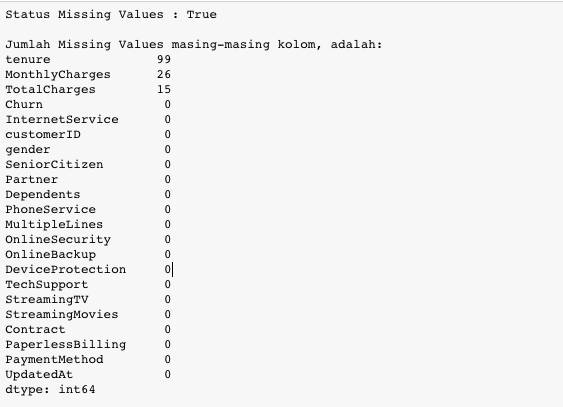

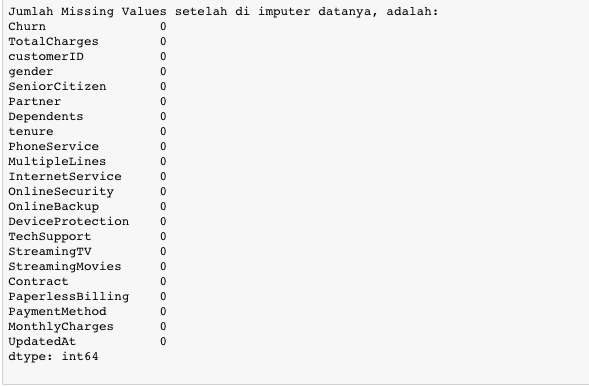

In [5]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges', 'TotalCharges']):
    #write your command here
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)
	
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneServic

## Mendeteksi adanya Outlier (Boxplot)
Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman). Berikut adalah tampilan umum dari boxplot dalam merepresentasikan outliers.



 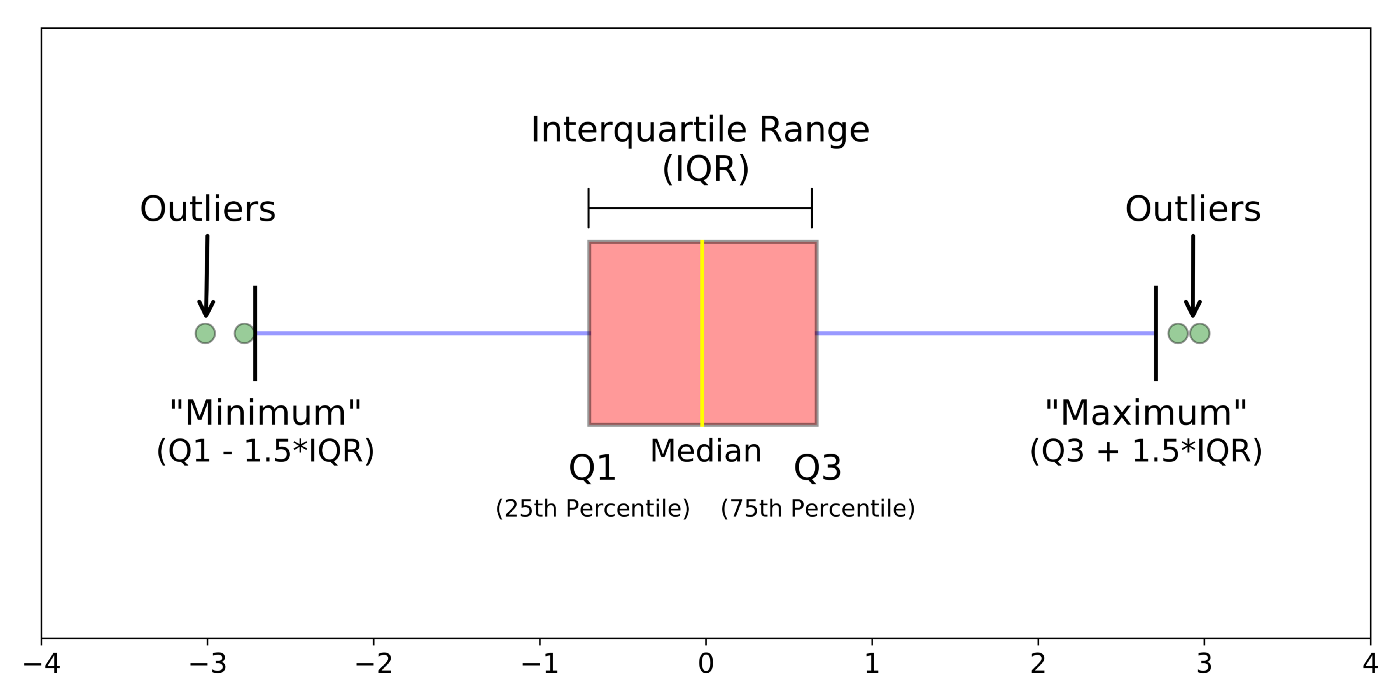

Penggunaan fungsi describe() pada kolom tenure, MonthlyCharges, dan TotalCharges ditunjukkan sebagai berikut.

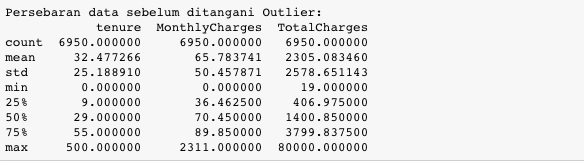

Melalui fungsi describe() ini kita hanya memperoleh statistik deskriptif ketiga kolom ini. Agar outlier pada ketiga kolom ini dapat dideteksi maka kamu diminta untuk memvisualisasikannya menggunakan boxplot-nya. Setiap satu boxplot ada di satu canvas figure. 


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


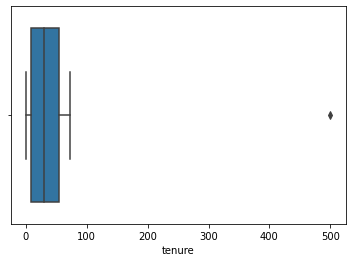

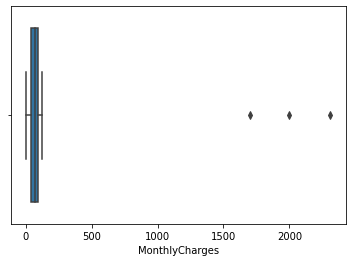

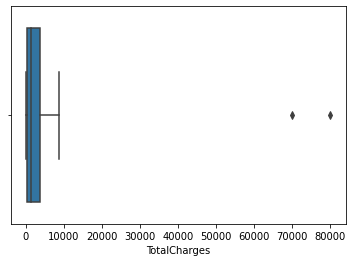

In [6]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
plt.figure()
sns.boxplot(x= df_load['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x= df_load['TotalCharges'])
plt.show()

## Mengatasi Outlier
Setelah kita mengetahui variable mana saja yang terdapat pencilan (outlier), selanjutnya kita akan atasi outlier dengan menggunakan metode interquartile range (IQR). Untuk detail jelasnya, bisa dilihat di ilustrasi di bawah ini:

 

Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk di olah di tahap ini. Gunakan fungsi quantile() untuk melihat quantile tertentu, dan gunakan mask() untuk me-replace nilai. Tentukan:

- Nilai minimum dan maximum data di tolerir
- Ubah nilai yang di luar range minimum & maximum ke dalam nilai minimum dan maximum

Hasil yang diharapkan adalah sebagai berikut:

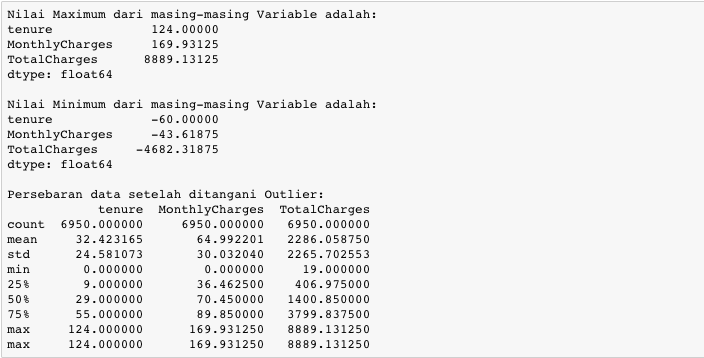

In [18]:
# Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(.25)
# Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(.75)
# IQR = Q3 - Q1
# maximum = Q3 + (1.5 * IQR)
# minimum = Q1 - (1.5 * IQR)

# print('Nilai Maximum dari masing masing variable :\n', maximum)
# print('\nNilai Minimum dari masing masing variable :\n', minimum)

# more= (df_load > maximum)
# df_load = df_load.mask(more, maximum, axis=1)
z = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [ ]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

# Your code goes here
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)

print('\nNilai Minimum dari masing-masing Variable adalah:')
print(minimum)

# ValueError: Operands are not aligned. Do left, right = left.align(right, axis=1, copy=False) if u have this 
# error maybe because your python version get to older and to handle this you can replace (< or >) 
# to (.gt() or .lt())[gt = greater than and lt = less than] or you can upgrade python to the latest version

more_than = (df_load.gt(maximum))
lower_than = (df_load.lt(minimum))

df_load = df_load.mask(more_than, maximum, axis = 1)
df_load = df_load.mask(lower_than, minimum, axis = 1)
print('\nPersebaran data setelah ditangani Outlier:')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print(more_than)

## Kesimpulan
Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.



## Mendeteksi Nilai yang tidak Standar
Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

Gunakan fungsi value_counts() untuk melihat jumlah data unique per variable-nya.

Adapun potongan dari hasil yang diharapkan adalah sebagai berikut:

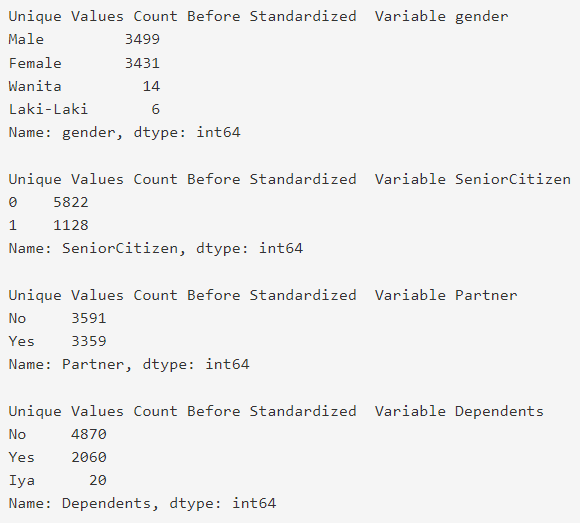

Notes: Pada gambar hanya ditampilkan sebagian output yang diharapkan.

In [81]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df_load.gt(maximum))
lower_than    = (df_load.lt(minimum))
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

# Loop
for col_name in list(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']):
	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', col_name)
	print(df_load[col_name].value_counts())
# Reference for coloring the text
#  https://gist.github.com/minism/1590432
# https://stackoverflow.com/questions/287871/how-do-i-print-colored-text-to-the-terminal/287944#287944


Unique Values Count Before Standardized  Variable gender
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable Partner
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: coun

## Menstandarisasi Variable Kategorik
Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard, maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. Gunakan fungsi replace() untuk menstandardkan nilai.

Berikut hasil yang diharapkan:

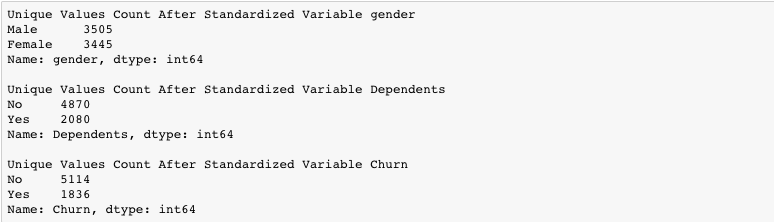

In [82]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df_load.gt(maximum))
lower_than    = (df_load.lt(minimum))
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

df_load = df_load.replace({'Iya' : 'Yes', 'Churn' : 'Yes',
						  'Wanita' : 'Female', 'Laki-Laki' : 'Male'})

#Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
 # write your command here
	print('\nUnique Values Count \033[1m' + 'After Standardized \033[0m Variable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After Standardized  Variable gender
gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized  Variable Dependents
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized  Variable Churn
Churn
No     5114
Yes    1836
Name: count, dtype: int64


## Kesimpulan
Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:

- Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
- Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
- Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.

Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.